In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None # 加快dataframe速度
from sklearn.model_selection import train_test_split# 分割資料
import logging
from sklearn.externals import joblib #模型儲存

from sklearn import tree # 決策樹
from sklearn.ensemble import RandomForestClassifier # 隨機森林
from xgboost import XGBClassifier # XGB 分類器

from collections import Counter #計數器
from sklearn.metrics import confusion_matrix #混淆矩陣
import matplotlib.pyplot as plt #繪圖


from keras.utils import np_utils # 轉onehot
# DNN by keras
import keras.models 
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing

/home/owo/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.
/home/owo/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/owo/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be underst

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np

def roc_plot(test, predict,title=None):
    fpr, tpr, thresholds = roc_curve(test, predict)
    roc_auc = auc(fpr, tpr)
#     plt.plot(fpr,tpr,lw=2,label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot(fpr,tpr,lw=2,)
    plt.plot([0,1],[0,1], lw=2, linestyle=':')
    plt.axis([0, 1, 0, 1])
#     plt.legend()
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    if title == None:
        plt.title('ROC curve AP={0:0.3f}'.format(roc_auc))
    else:
        plt.title(title +' :ROC curve AP={0:0.3f}'.format(roc_auc))
    plt.show()

In [3]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


def prc_plot(classifier,x_test,y_test,title = None):
    labelencoder = LabelEncoder()
    y_predict = classifier.predict(x_test)
    average_precision = average_precision_score(
        labelencoder.fit_transform(y_test), 
        labelencoder.fit_transform(y_predict)
    )
    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))
    disp = plot_precision_recall_curve(classifier, x_test, y_test)
    plt.axis([0, 1.05, 0, 1.05])
    if title is None:
        disp.ax_.set_title('%s:Precision-Recall curve: '
                       'AP={0:0.3f}'.format(average_precision))
    else:
        disp.ax_.set_title('%s:Precision-Recall curve: '
                       'AP={0:0.3f}'.format(average_precision) % title)

In [4]:
def build_dnn(layers = None):
    model = Sequential()
    model.add(Dense(input_dim=layers[0],units=layers[1]))
    model.add(Activation('relu'))
    for i in range(2,len(layers)-1):
        model.add(Dense(units=layers[i]))
        model.add(Activation('relu'))
    
    model.add(Dense(units=layers[-1]))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [5]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import numpy as np

def cm_plot(original_label, predict_label,title=None):
    cm = confusion_matrix(original_label, predict_label)   # 由原标签和预测标签生成混淆矩阵
    plt.figure()
    
    plt.imshow(cm,cmap=plt.cm.get_cmap('gray', 1))
#     plt.matshow(cm, cmap=plt.cm.Blues)     # 画混淆矩阵，配色风格使用cm.Blues
#     plt.colorbar()    # 颜色标签
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[y, x], xy=(x, y), horizontalalignment='center', verticalalignment='center')
            # annotate主要在图形中添加注释1
            # 第一个参数添加注释
            # 第二个参数是注释的内容
            # xy设置箭头尖的坐标
            # horizontalalignment水平对齐
            # verticalalignment垂直对齐
            # 其余常用参数如下：
            # xytext设置注释内容显示的起始位置
            # arrowprops 用来设置箭头
            # facecolor 设置箭头的颜色
            # headlength 箭头的头的长度
            # headwidth 箭头的宽度
            # width 箭身的宽度
    ax = plt.gca()
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    if title == None:
        plt.title('confusion matrix')
    else:
        plt.title(title)

In [10]:
class esml:
    """
    esml - easy model : 目的在於快速簡單對資料做初步分析和比較結果
        內含模型：
            L sklearn tree
            L sklearn random forest
            L sklearn XGBoost
            L keras DNN
        內含結果分析：
            L 準確率
            L 混淆矩陣
            L ROC 曲線
            L PRC 曲線
            L 訓練曲線(DNN)
            L 重要特徵(XGB)
    version : beta 1.0
    
    
    """
    
    # 初始化，建立好sklearn的三種模型
    def __init__(self):
        self.dtc = tree.DecisionTreeClassifier()
        self.rfc = RandomForestClassifier()
        self.xgbc = XGBClassifier()
        self.acc = {}
        self.cm = {}
    
    # 重載[]讀取符號
    def __getitem__(self,index):
        return self.df[index]
    
    # 讀取資料
    def read_file(self,filename = None, remove_title = False):
        file_type = filename.split(".")[-1]
        if file_type == "csv":
            self.df = pd.read_csv(filename)
        elif file_type == "xlsx":
            self.df = pd.read_excel(filename)
        if remove_title is True:
            self.df.drop([0],inplace=True)
        print("Read file with:%s\n" %filename)
    
    # 選擇要用的feature和label
    def load_data(self,features=None,label = "Result",drop_select=None):
        # 沒給features的時候預設除了label以外的其他所有
        if features == None:
            features = list(self.df.columns)
            features.remove(label)
            
        # 檢查feature存在
        for item in features:
            if item not in self.df.columns:
                print("Error: \"%s\" is not in columns name" % str(item))
                return
        # 檢查label存在
        if label not in self.df.columns:
            print("Error: \"%s\" is not in columns name" % str(label))
            return
        # 檢查是否需要篩選
        if drop_select is not None:
            if type(drop_select) is list:
                for drop_type in drop_select:
                    self.df = self.df[self.df[label] != drop_type]
            else:
                self.df = self.df[self.df[label] != drop_select]
        
        self.X = self.df[features]
        self.Y = self.df[label]
        print("The features is %s" % str(features))
        print("The label is [%s]" % str(label))
        print()
    
    
    # 切分資料
    def split(self,split_rate = 0.25,random_state=0):
        # split train/test
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.X, self.Y, test_size=split_rate, random_state=random_state)
        print("train:test = %d : %d" % (int((1-split_rate)*100), int(split_rate*100)))
        print("test includes:")
        print(Counter(self.Y_test))
        print()
        
    # 訓練model
    def fit(self,
            tree = True,
            random_forest = True, 
            xgboost = True):
        
        # fit decicion tree
        if tree is True:
            self.dtc.fit(self.X_train, self.Y_train)
            print("fit decision tree")
            self.acc["dtc"] = self.dtc.score(self.X_test, self.Y_test)
            self.cm["dtc"] = confusion_matrix(self.Y_test,
                                             self.dtc.predict(self.X_test))
        
        # fit random forest
        if random_forest is True:
            self.rfc.fit(self.X_train, self.Y_train)
            print("fit random forest")
            self.acc["rfc"] = self.rfc.score(self.X_test, self.Y_test)
            self.cm["rfc"] = confusion_matrix(self.Y_test,
                                             self.rfc.predict(self.X_test))
            
        # fit XGBoost
        if xgboost is True:
            self.xgbc.fit(self.X_train, self.Y_train)
            print("fit xgboost")
            self.acc["xgbc"] = self.xgbc.score(self.X_test, self.Y_test)
            self.cm["xgbc"] = confusion_matrix(self.Y_test,
                                             self.xgbc.predict(self.X_test))
            
    # 顯示模型狀態
    def show_model(self,
                tree = True,
                random_forest = True, 
                xgboost = True):
        
        # show decicion tree
        if tree is True:
            print(self.dtc)
        
        # show random forest
        if random_forest is True:
            print(self.rfc)
            
        # fit XGBoost
        if xgboost is True:
            print(self.rfc)
        
    # 顯示準確率
    def accuracy(self,
                tree = True,
                random_forest = True, 
                xgboost = True):
        print("\nAccuracy:")
        
        # show decicion tree
        if tree is True:
            print("\tDecision Tree is %.3f" % self.acc["dtc"])
            
        
        # show random forest
        if random_forest is True:
            print("\tRandom Forest is %.3f" % self.acc["rfc"])
            
        # fit XGBoost
        if xgboost is True:
            print("\tXGBoost is %.3f" % self.acc["xgbc"])
        
        print()
        
#     def count(self):
        
    # roc curve
    def roc(self,
            tree = True,
            random_forest = True, 
            xgboost = True):
        
        # 檢查是否為二分類
        if len(set(self.Y_train)) != 2:
            print("ROC曲線只支援二分類")
            return
    
        # show decicion tree
        if tree is True:
            roc_plot(self.dtc.predict(self.X_test), self.Y_test,"Decision Tree")
        
        # show random forest
        if random_forest is True:
            roc_plot(self.rfc.predict(self.X_test), self.Y_test,"Random Forest")
            
        # fit XGBoost
        if xgboost is True:
            roc_plot(self.xgbc.predict(self.X_test), self.Y_test,"XGboost")
            
    # PRC curve
    def prc(self,
            tree = True,
            random_forest = True, 
            xgboost = True):
        
        # 檢查是否為二分類
        if len(set(self.Y_train)) != 2:
            print("PRC曲線只支援二分類")
            return
        
        # show decicion tree
        if tree is True:
            prc_plot(self.dtc, self.X_test, self.Y_test, "Decision Tree")
        
        # show random forest
        if random_forest is True:
            prc_plot(self.rfc, self.X_test, self.Y_test, "Random Forest")
            
        # fit XGBoost
        if xgboost is True:
            prc_plot(self.xgbc, self.X_test, self.Y_test, "XGboost")
    
    
    
    def confusion_matrix(self,
            tree = True,
            random_forest = True, 
            xgboost = True):
        
        # show decicion tree
        if tree is True:
            cm_plot(self.Y_test, predict_label=self.dtc.predict(self.X_test), title="Decision Tree")
        
        # show random forest
        if random_forest is True:
            cm_plot(self.Y_test, predict_label=self.rfc.predict(self.X_test), title="Random Forest")
            
        # fit XGBoost
        if xgboost is True:
            cm_plot(self.Y_test, predict_label=self.xgbc.predict(self.X_test), title="XGboost")
        
    
    
    # 顯示結果 
    def show_result(self,
            acc = True,
            F1 = False,
            cm = False,
            ROC = False,
            recall = False
            ):
        print("Show result:\n")
        
        
        accuracy()
        roc()
        prc()
        
        

測試：
Read file with:./data/wine_data.csv

The features is ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_dilute_wines', 'Proline']
The label is [Class]

train:test = 75 : 25
test includes:
Counter({2: 19, 1: 14})

fit decision tree
fit random forest
fit xgboost

Accuracy:
	Decision Tree is 1.000
	Random Forest is 1.000
	XGBoost is 1.000

Average precision-recall score: 1.000
Average precision-recall score: 1.000
Average precision-recall score: 1.000


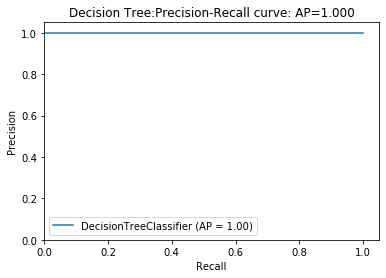

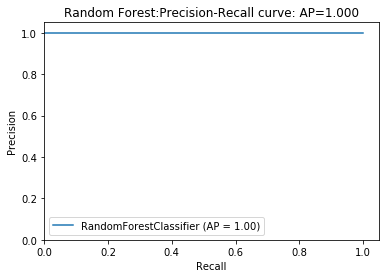

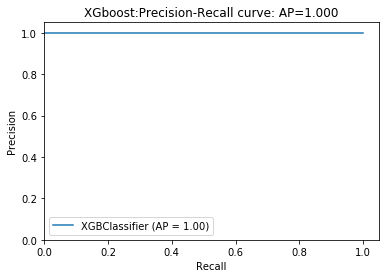

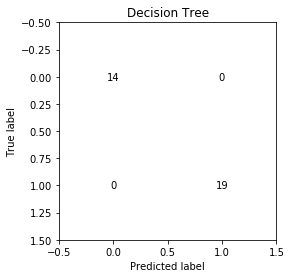

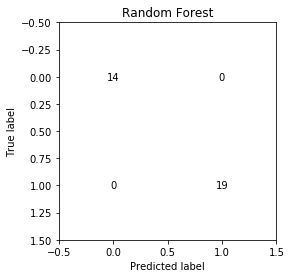

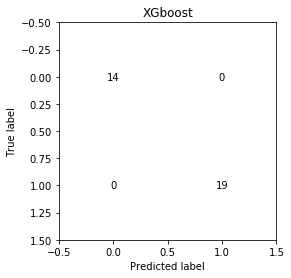

In [7]:
if __name__ == "__main__":
    print("測試：")
    tmp = esml()
    tmp.read_file(filename="./data/wine_data.csv",remove_title=True)
    tmp.load_data(features = None, label = "Class",drop_select=[3])
    tmp.split(split_rate = 0.25, random_state = 1)
    tmp.fit()
    tmp.accuracy()
#     tmp.roc()
    tmp.prc()
    tmp.confusion_matrix()